In [43]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def load_data():
    df = sns.load_dataset('iris')
    return df

In [45]:
def preprocess_data(df):
    df['species'], _ = pd.factorize(df['species'])
    return df

In [46]:
def visualize_3d_scatter(df, x_col, y_col, z_col):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x_col], df[y_col], df[z_col])
    ax.set_xlabel(x_col.capitalize())
    ax.set_ylabel(y_col.capitalize())
    ax.set_zlabel(z_col.capitalize())
    plt.title('3D Scatter Plot Example')
    plt.show()

In [47]:
def visualize_scatter(df, x_col, y_col, hue_col):
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col)
    plt.show()

In [48]:
def gmm_clustering(df, feature_cols, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(df[feature_cols])
    df['cluster'] = gmm.predict(df[feature_cols])
    return df

In [49]:
def evaluate_clustering(df, true_col, predicted_col, class_labels):
    cm = confusion_matrix(df[true_col], df[predicted_col])
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [50]:
def main():
    df = load_data()
    df = preprocess_data(df)
    visualize_3d_scatter(df, 'petal_length', 'petal_width', 'species')
    visualize_3d_scatter(df, 'sepal_length', 'sepal_width', 'species')
    visualize_scatter(df, 'sepal_length', 'sepal_width', 'species')
    visualize_scatter(df, 'petal_length', 'petal_width', 'species')

    df = gmm_clustering(df, ['petal_length', 'petal_width'], 3)

    class_labels = ['Setosa', 'Versicolor', 'Virginica']
    evaluate_clustering(df, 'species', 'cluster', class_labels)

In [56]:
from sklearn.metrics import confusion_matrix

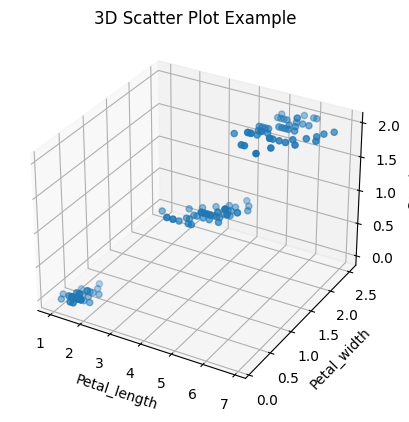

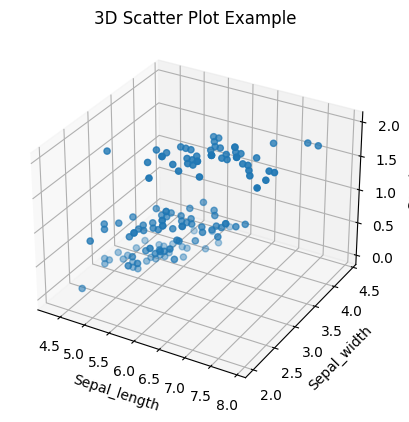

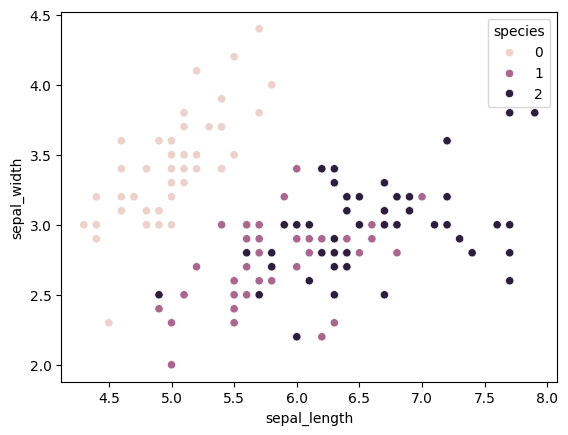

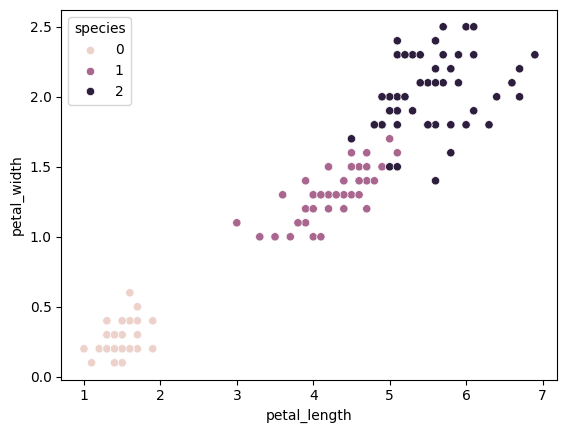

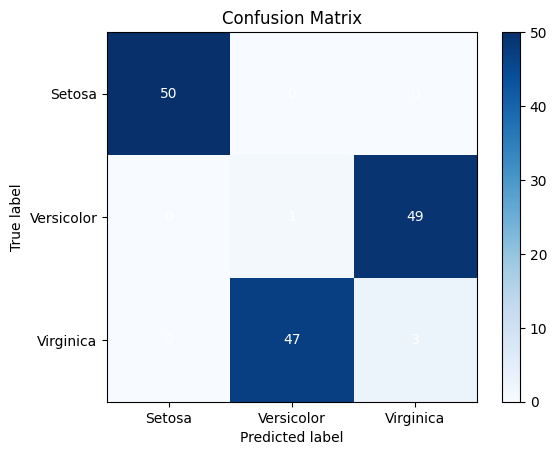

In [57]:
if __name__ == "__main__":
  main()